# <div style="display: flex; justify-content: center; background-color:#003049; font-family:Times New Roman; color:#ff006e; padding: 10px; line-height: 1; border-radius: 70px; margin-bottom: 0em; text-align: center; font-size: 80px; border-style: solid; border-color: #003566; font-weight: bold;"> Hand Written Digits Recognition</div>

<br>    
<p style="text-align: center;">
<img src="images\Digists.png" style='width: 700px; height: 600px;'>
</p>    

<a id="top"></a>

# <div style="display: flex; justify-content: center; background-color:#003049; font-family:Times New Roman; color:#ff006e; padding: 10px; line-height: 1; border-radius: 70px; margin-bottom: 0em; text-align: center; font-size: 80px; border-style: solid; border-color: #003566; font-weight: bold;"> Table Of Contents</div>

* [Importing Libraries](#1)
* [Loading- "MNIST" Data Set](#2)
* [Exploratory Data Analysis (EDA)](#3)
* [Data Preprocessin](#4)
* [Creating A deep Neural Network](#5)
* [Model Evaluation](#6)

<a id="1"></a>

# <div style="display: flex; justify-content: center; background-color:#003049; font-family:Times New Roman; color:#ff006e; padding: 10px; line-height: 1; border-radius: 70px; margin-bottom: 0em; text-align: center; font-size: 80px; border-style: solid; border-color: #003566; font-weight: bold;"> Importing Libraries</div>

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings("ignore")

<a id="2"></a>

# <div style="display: flex; justify-content: center; background-color:#003049; font-family:Times New Roman; color:#ff006e; padding: 10px; line-height: 1; border-radius: 70px; margin-bottom: 0em; text-align: center; font-size: 80px; border-style: solid; border-color: #003566; font-weight: bold;"> Loading- "MNIST" Data Set </div>

In [2]:
mnist = tf.keras.datasets.mnist

<center> <span style="font-family:Comic Sans MS"> <span style="padding:5px; display:fill; border-radius:20px 50px; background-color:#003049; font-size:200%; font-weight: 500; color:#ff006e; overflow:hidden;">Divide into training and Testing sets</span>

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
print(f"The Shape Of X Train: {X_train.shape}")
print(f"The Shape Of y Train: {y_train.shape}")
print(f"The Shape Of X Test: {X_test.shape}")
print(f"The Shape Of y Test: {y_test.shape}")

The Shape Of X Train: (60000, 28, 28)
The Shape Of y Train: (60000,)
The Shape Of X Test: (10000, 28, 28)
The Shape Of y Test: (10000,)


<a id="3"></a>

# <div style="display: flex; justify-content: center; background-color:#003049; font-family:Times New Roman; color:#ff006e; padding: 10px; line-height: 1; border-radius: 70px; margin-bottom: 0em; text-align: center; font-size: 80px; border-style: solid; border-color: #003566; font-weight: bold;"> Exploratory Data Analysis (EDA) </div>


<center> <span style="font-family:Comic Sans MS"> <span style="padding:5px; display:fill; border-radius:20px 50px; background-color:#003049; font-size:200%; font-weight: 500; color:#ff006e; overflow:hidden;">Getting An Instance For Each Unique Label</span>

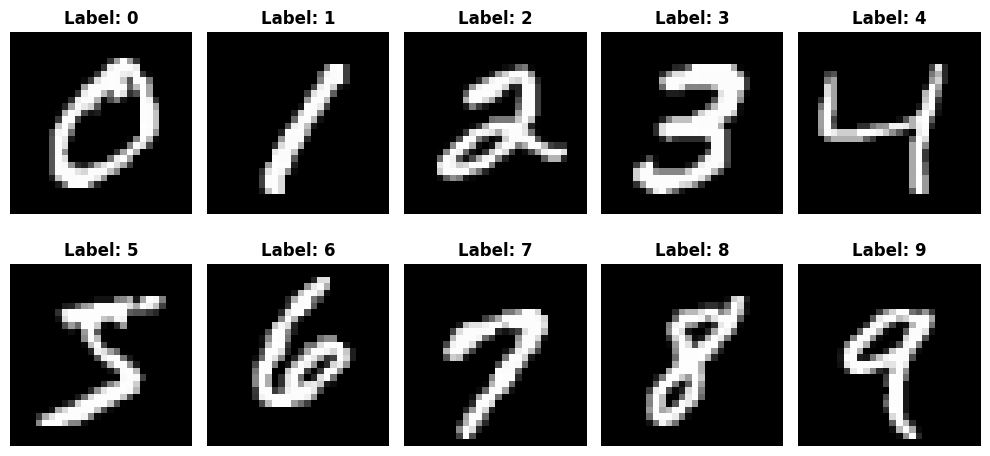

In [5]:
unique_labels = np.unique(y_train)
images = []
labels = []

for label in unique_labels:
    index = np.where(y_train == label)[0][0]
    images.append(X_train[index])
    labels.append(y_train[index])

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 5))
axes = axes.flatten()

for index, (image, label) in enumerate(zip(images, labels)):
    axes[index].imshow(image, cmap="gray")
    axes[index].set_title(f"Label: {label}", fontweight="bold")
    axes[index].axis("off")
    
plt.tight_layout()

<center> <span style="font-family:Comic Sans MS"> <span style="padding:5px; display:fill; border-radius:20px 50px; background-color:#003049; font-size:200%; font-weight: 500; color:#ff006e; overflow:hidden;">Getting Random Samples</span>

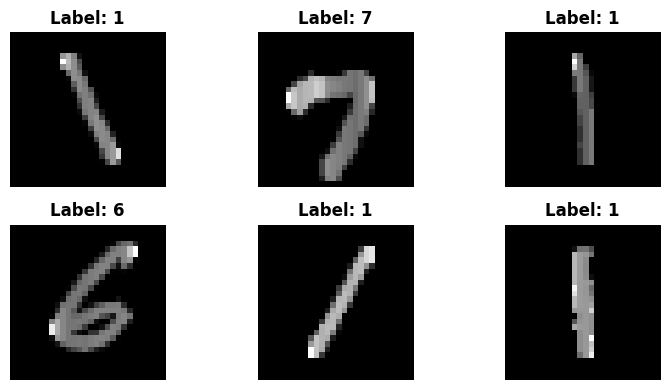

In [19]:
plt.figure(figsize=(8, 4))
for i in range(6):
    ax = plt.subplot(2, 3, i+1)
    randIndex = np.random.randint(0, X_train.shape[0])
    plt.imshow(X_train[randIndex], cmap="gray")
    plt.title(f"Label: {y_train[randIndex]}", fontweight="bold")
    plt.axis(False)

plt.tight_layout()

<a id="4"></a>

# <div style="display: flex; justify-content: center; background-color:#003049; font-family:Times New Roman; color:#ff006e; padding: 10px; line-height: 1; border-radius: 70px; margin-bottom: 0em; text-align: center; font-size: 80px; border-style: solid; border-color: #003566; font-weight: bold;"> Data Preprocessin</div>

<center> <span style="font-family:Comic Sans MS"> <span style="padding:5px; display:fill; border-radius:20px 50px; background-color:#003049; font-size:200%; font-weight: 500; color:#ff006e; overflow:hidden;">Normalizing The Data</span>

In [7]:
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

<center> <span style="font-family:Comic Sans MS"> <span style="padding:5px; display:fill; border-radius:20px 50px; background-color:#003049; font-size:200%; font-weight: 500; color:#ff006e; overflow:hidden;">Getting Some Random Samples After Normalization</span>

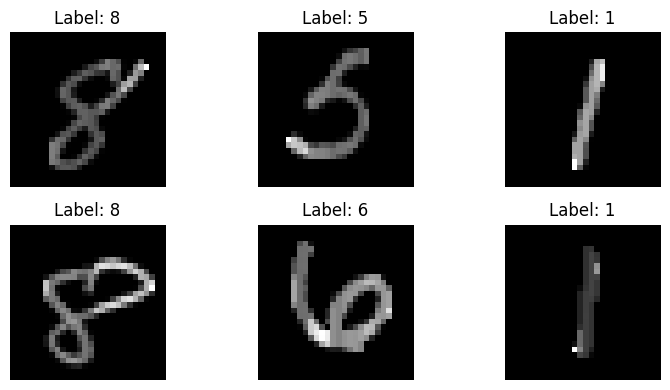

In [8]:
plt.figure(figsize=(8, 4))
for i in range(6):
    plt.subplot(2, 3, i+1)
    index = np.random.randint(0, X_train.shape[0])
    plt.imshow(X_train[index], cmap="gray");
    plt.title(f"Label: {y_train[index]}")
    plt.axis("off")

plt.tight_layout()

<center> <span style="font-family:Comic Sans MS"> <span style="padding:5px; display:fill; border-radius:20px 50px; background-color:#003049; font-size:200%; font-weight: 500; color:#ff006e; overflow:hidden;">Adding An Extra Dimension </span>

In [9]:
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

print(f"Training Samples Dimension: {X_train.shape}")
print(f"Testing Samples Dimension: {X_test.shape}")

Training Samples Dimension: (60000, 28, 28, 1)
Testing Samples Dimension: (10000, 28, 28, 1)


<a id="5"></a>

# <div style="display: flex; justify-content: center; background-color:#003049; font-family:Times New Roman; color:#ff006e; padding: 10px; line-height: 1; border-radius: 70px; margin-bottom: 0em; text-align: center; font-size: 80px; border-style: solid; border-color: #003566; font-weight: bold;">Creating A deep Neural Network</div>

In [10]:
# tf.random.set_seed(123)

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu", input_shape=X_train.shape[1:]),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=64, activation="relu"),
    tf.keras.layers.Dense(units=10, activation="softmax")
])

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
            optimizer=tf.keras.optimizers.Adam(), 
            metrics=["accuracy"])

history = model.fit(X_train, 
                    y_train,
                    epochs=5, 
                    validation_split=0.3)

Epoch 1/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7970 - loss: 0.6308 - val_accuracy: 0.9402 - val_loss: 0.1917
Epoch 2/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.9684 - loss: 0.1058 - val_accuracy: 0.9703 - val_loss: 0.0970
Epoch 3/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.9782 - loss: 0.0738 - val_accuracy: 0.9749 - val_loss: 0.0830
Epoch 4/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.9840 - loss: 0.0514 - val_accuracy: 0.9794 - val_loss: 0.0639
Epoch 5/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.9865 - loss: 0.0428 - val_accuracy: 0.9831 - val_loss: 0.0572


<a id="6"></a>

# <div style="display: flex; justify-content: center; background-color:#003049; font-family:Times New Roman; color:#ff006e; padding: 10px; line-height: 1; border-radius: 70px; margin-bottom: 0em; text-align: center; font-size: 80px; border-style: solid; border-color: #003566; font-weight: bold;">Model Evaluation</div>

<center> <span style="font-family:Comic Sans MS"> <span style="padding:5px; display:fill; border-radius:20px 50px; background-color:#003049; font-size:200%; font-weight: 500; color:#ff006e; overflow:hidden;">Visualizing Accuracy & Loss</span>

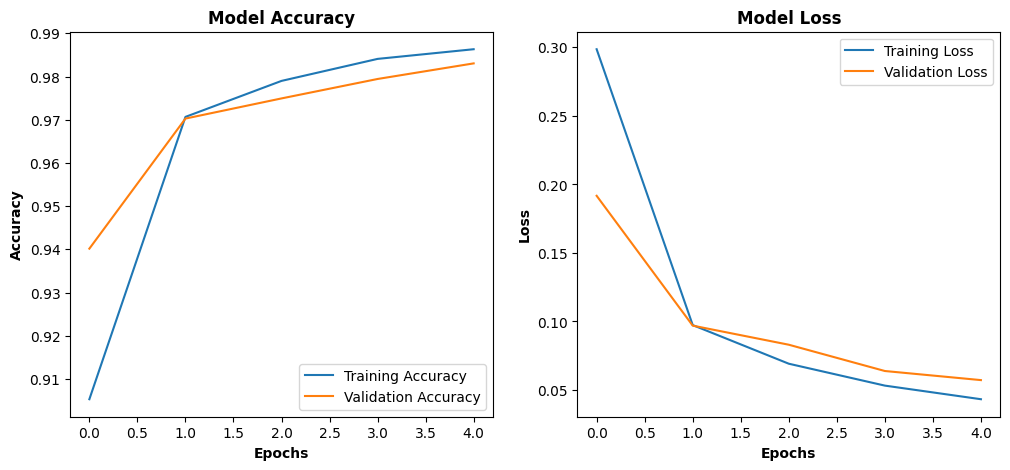

In [11]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.title("Model Accuracy", fontweight="bold")
plt.xlabel("Epochs", fontweight="bold")
plt.ylabel("Accuracy", fontweight="bold")
plt.legend(loc="lower right");

plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("Model Loss", fontweight="bold")
plt.xlabel("Epochs", fontweight="bold")
plt.ylabel("Loss", fontweight="bold")
plt.legend(loc="best");

<center> <span style="font-family:Comic Sans MS"> <span style="padding:5px; display:fill; border-radius:20px 50px; background-color:#003049; font-size:200%; font-weight: 500; color:#ff006e; overflow:hidden;">Model Summary (Shapes & Parameters)</span>

In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 237,920 (929.38 KB)

 Trainable params: 79,306 (309.79 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 158,614 (619.59 KB)

<center> <span style="font-family:Comic Sans MS"> <span style="padding:5px; display:fill; border-radius:20px 50px; background-color:#003049; font-size:200%; font-weight: 500; color:#ff006e; overflow:hidden;">Evaluating The Model On The Test Set</span>

In [13]:
testInfo = model.evaluate(X_test, y_test, return_dict=True)

print(f"Test Accuracy On {y_test.shape[0]} Test Samples: {testInfo['accuracy']}")
print(f"Test Loss On {y_test.shape[0]} Test Samples: {testInfo['loss']}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9785 - loss: 0.0700
Test Accuracy On 10000 Test Samples: 0.9832000136375427
Test Loss On 10000 Test Samples: 0.055113013833761215


<center> <span style="font-family:Comic Sans MS"> <span style="padding:5px; display:fill; border-radius:20px 50px; background-color:#003049; font-size:200%; font-weight: 500; color:#ff006e; overflow:hidden;"> Confusion Matrix</span>

In [14]:
y_probas = model.predict(X_test)
y_pred = y_probas.argmax(axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


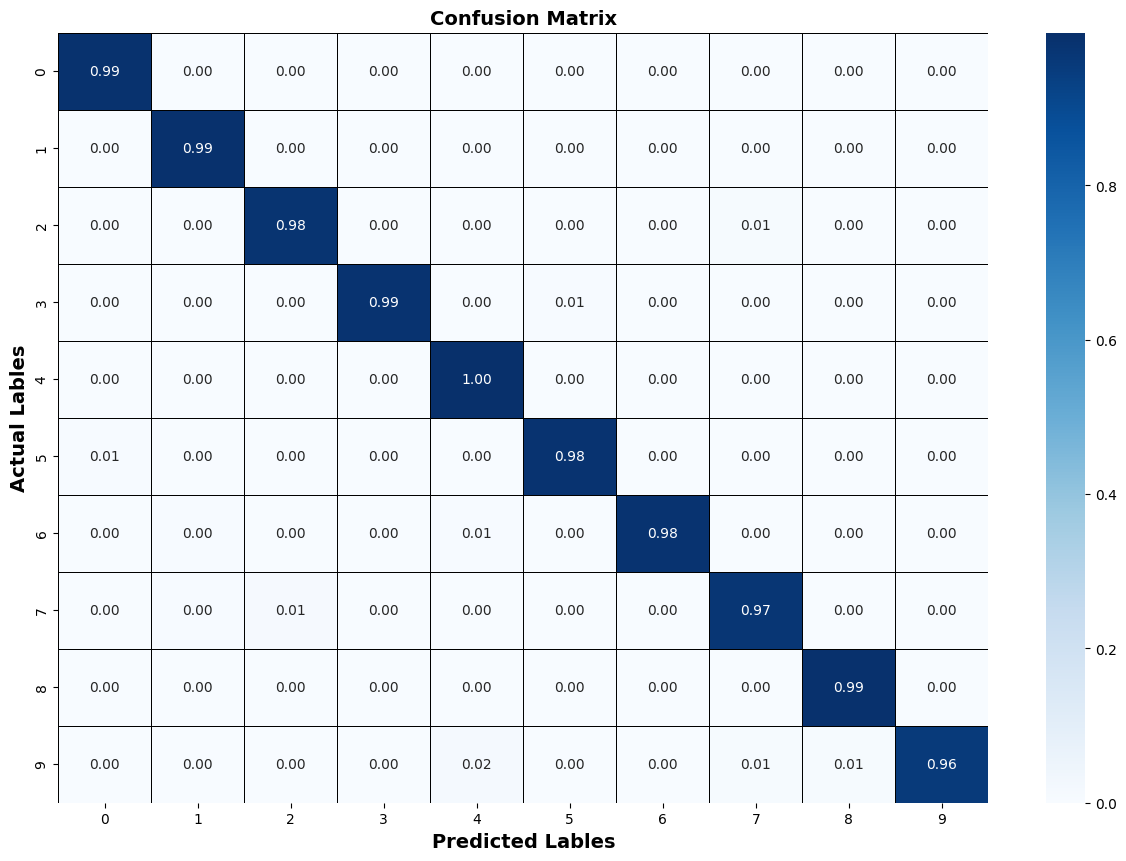

In [15]:
plt.figure(figsize=(15, 10))
cm = confusion_matrix(y_test, y_pred)
cmNormalized = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]

ax = plt.subplot()
sns.heatmap(cmNormalized, 
            annot=True, 
            ax=ax, 
            cbar=True, 
            linecolor="black", 
            linewidths=0.4,
            fmt=".2f", 
            cmap="Blues")
ax.set_xlabel("Predicted Lables", fontweight='bold', fontsize=14)
ax.set_ylabel("Actual Lables", fontweight='bold', fontsize=14)
ax.set_title("Confusion Matrix", fontweight="bold", fontsize=14)
ax.xaxis.set_ticklabels(np.unique(y_train))
ax.yaxis.set_ticklabels(np.unique(y_train))
plt.show()

<center> <span style="font-family:Comic Sans MS"> <span style="padding:5px; display:fill; border-radius:20px 50px; background-color:#003049; font-size:200%; font-weight: 500; color:#ff006e; overflow:hidden;">Test The Model On Random Sample And Displaying The Results</span>

In [16]:
def predict_random_image(model, test_data, true_labels):
    RandIndex = np.random.randint(0, test_data.shape[0]+1)
    image = test_data[RandIndex]
    probas = model.predict(np.expand_dims(image, axis=0))
    pred_label = probas.argmax()
    true_label = true_labels[RandIndex]
    if pred_label == true_label:
        color = "green"
    else:
        color = "red"
    
    plt.imshow(image.squeeze(), cmap="gray")
    plt.title(f"Model Prdiction: {pred_label} With {probas.max() * 100 :2.0f}% Confidence (True Label: {true_label})", 
                color=color)
    plt.axis("off")
    
    plt.tight_layout()
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


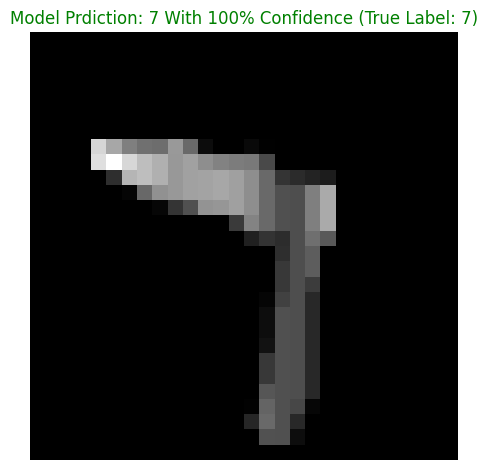

In [21]:
predict_random_image(model, X_test, y_test)

## 
<center> <span style="font-family:Comic Sans MS"> <span style="padding:5px; display:fill; border-radius:20px 50px; background-color:#003049; font-size:200%; font-weight: 500; color:#ff006e; overflow:hidden;">Saving The Model</span>

In [18]:
model.save("HandWritten.keras")

<body>
    <center>
        <div style="font-family: Comic Sans MS; background-color: #003049; color: #ff006e; padding: 12px; line-height: 1; font-weight: bold; font-size: 50px; border-style: solid; border-color: dark green;">
            By: Mohamed Ghannnam
        </div>
    </center>
    <center>
        <div style="font-family: Trebuchet MS; background-color: #003049; color: #ff006e; padding: 12px; line-height: 1; font-weight: bold; font-size: 50px; border-style: solid; border-color: dark green;">
            Thank You!
        </div>
        <div style="font-family: Trebuchet MS; background-color: #003049; color: #ff006e; padding: 12px; line-height: 1; font-weight: bold; font-size: 50px; border-style: solid; border-color: dark green; margin-top: 20px;">
            <a href="https://www.linkedin.com/in/mohamedghannnam/" style="text-decoration: none; color: #ff006e;">
                <i class="fa-brands fa-linkedin" style="font-size: 50px; vertical-align: middle; color: #ff006e;"></i> Click Here ==> LinkedIn 
            </a>
        </div>
    </center>
</body>
